<a href="https://colab.research.google.com/github/theHoodguy4587/Crypto-Price-prediction/blob/main/Crypto_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import plotly.graph_objects as go

In [ ]:
url="https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params={"vs_currency":"usd","days":90}

response=requests.get(url,params=params)
data=response.json()

prices=data["prices"]

df=pd.DataFrame(prices,columns=["timestamp","price"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms")
df.set_index("date",inplace=True)
df.head()


,timestamp,price
date,,
2025-08-19 06:02:28.348,1755583348348,115021.978158
2025-08-19 07:02:51.797,1755586971797,114985.895681
2025-08-19 08:01:05.724,1755590465724,115011.334372
2025-08-19 09:00:29.123,1755594029123,115244.104589
2025-08-19 10:00:58.919,1755597658919,115371.186471


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df.index,y=df["price"],mode="lines",name="BTC price"))
fig.update_layout(title="Bitcoin Price-Last 90 days",xaxis_title="Date",yaxis_title="Price in USD")
fig.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df[['price']].values)


In [ ]:
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

In [ ]:
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
X_test,y_test=[],[]

test_data=np.concatenate((train_data[-60:],test_data))

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])

X_test,y_test=np.array(X_test),np.array(y_test)

In [ ]:
X_train=X_train.reshape((X_train.shape[0],60,1))
X_test=X_test.reshape((X_test.shape[0],60,1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.1184 - val_loss: 0.0051
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.0084 - val_loss: 0.0048
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0065 - val_loss: 0.0040
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.

In [ ]:
predictions =model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
y_test_actual=scaler.inverse_transform(y_test.reshape(-1,1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


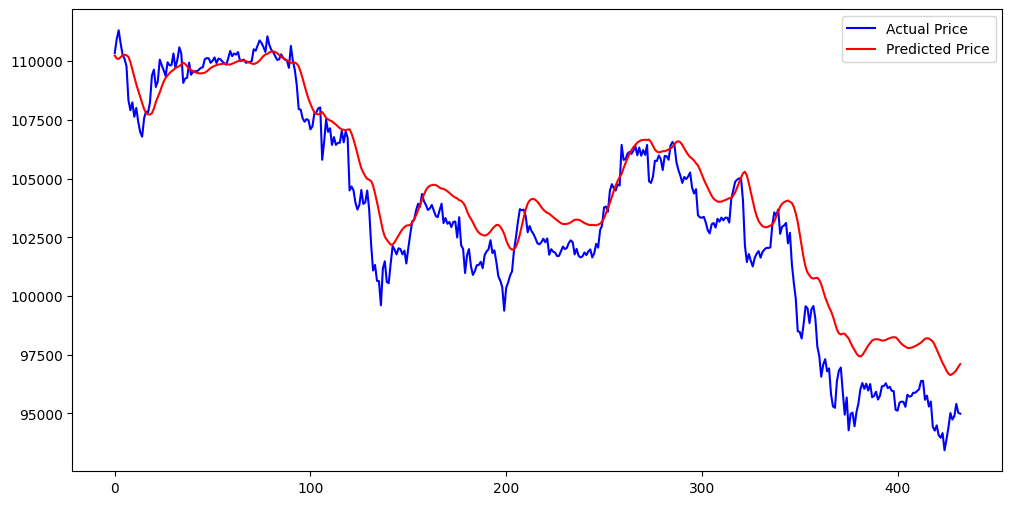

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual,label="Actual Price",color="blue")
plt.plot(predictions,label="Predicted Price",color="red")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test_actual,predictions)
mae=mean_absolute_error(y_test_actual,predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2523090.235039711
Mean Absolute Error: 1245.7414894555252


In [ ]:
model.save("bitcoin_lstm_model.keras")

In [ ]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
from google.colab import files
files.download("bitcoin_lstm_model.keras")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>